# Chuẩn bị dữ liệu

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Dtest1.csv to Dtest1.csv
Saving Dtrain1.csv to Dtrain1.csv


In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau # type: ignore
from tensorflow.keras.metrics import Precision, Recall # type: ignore
import matplotlib.pyplot as plt

# Đọc dữ liệu đã lọc
dtrain = pd.read_csv('/content/Dtrain1.csv')
dtest = pd.read_csv('/content/Dtest1.csv')

# Bộ train
X = dtrain.iloc[:, :-1].values  # Các cột đặc trưng
y = dtrain.iloc[:, -1].values   # Cột nhãn

# Bộ test
Xt = dtest.iloc[:, :-1].values  # Các cột đặc trưng
yt = dtest.iloc[:, -1].values   # Cột nhãn

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Xt_scaled = scaler.transform(Xt)

# Mã hóa nhãn thành số nguyên
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
yt_encoded = label_encoder.fit_transform(yt)

# Chuyển nhãn thành dạng one-hot encoding
y_onehot = to_categorical(y_encoded, num_classes=15)
yt_onehot = to_categorical(yt_encoded, num_classes=15)

# Chia tập dữ liệu thành train và test
X_train, X_test, y_train, y_test = X_scaled, Xt_scaled, y_onehot, yt_onehot

# Định hình lại dữ liệu cho LSTM (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))  # reshape sau khi SMOTE hoặc class_weight
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Xây dựng mô hình GRU

In [20]:
from tensorflow.keras.layers import Input
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(GRU(units=100, return_sequences=True))
model.add(GRU(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=15, activation='softmax'))

**Compile mô hình**

In [21]:
optimizers = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizers, loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Huấn luyện model

In [22]:
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/30
613/613 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5747 - loss: 2.1404 - precision: 0.7313 - recall: 0.0565 - val_accuracy: 0.8797 - val_loss: 0.7468 - val_precision: 0.9767 - val_recall: 0.6604
Epoch 2/30
613/613 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8940 - loss: 0.5695 - precision: 0.9711 - recall: 0.7321 - val_accuracy: 0.9506 - val_loss: 0.2373 - val_precision: 0.9639 - val_recall: 0.9211
Epoch 3/30
613/613 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9531 - loss: 0.2146 - precision: 0.9687 - recall: 0.9329 - val_accuracy: 0.9706 - val_loss: 0.1243 - val_precision: 0.9756 - val_recall: 0.9650
Epoch 4/30
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9697 - loss: 0.1287 - precision: 0.9748 - recall: 0.9639 - val_accuracy: 0.9754 - val_loss: 0.0903 - val_precision: 0.9767 - val_recall: 0.9716
Epoch 5/30
613/613 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9726 - loss: 0.0981 - precision: 0.9754 - recall: 0.9698 - val_accuracy: 0.9765 - val_loss: 0.

# Đánh giá model

306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9909 - loss: 0.0247 - precision: 0.9915 - recall: 0.9909
Accuracy: 98.23%
Loss: 0.0408681221306324
Precision: 98.25%
Recall: 98.23%


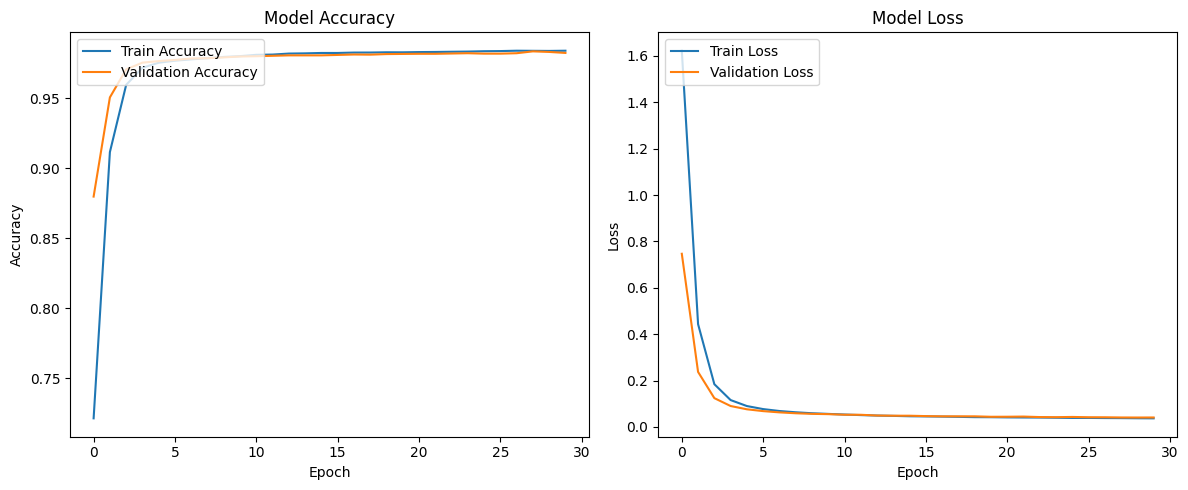

In [23]:
# Đánh giá mô hình trên tập test
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Loss: {loss}')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')

# Lưu mô hình
model.save('my_model.keras')

# Tạo figure và chia làm 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Vẽ biểu đồ Accuracy
axs[0].plot(history.history['accuracy'], label='Train Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='upper left')

# Vẽ biểu đồ Loss
axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper left')

# Hiển thị cả hai biểu đồ cùng lúc
plt.tight_layout()
plt.show()

# Thử nghiệm

In [25]:
# Sử dụng mô hình đã huấn luyện để dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Chuyển dự đoán thành nhãn
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Giải mã nhãn dự đoán thành tên loại tấn công
predicted_attack_names = label_encoder.inverse_transform(y_pred_labels)

# Hiển thị nhãn thực tế và nhãn dự đoán
print("Nhãn thực tế và dự đoán:")
for i in range(10000):  # In 10 dự đoán đầu tiên để kiểm tra
    print(f"Nhãn thực tế: {label_encoder.inverse_transform([y_test_labels[i]])[0]} - Dự đoán: {predicted_attack_names[i]}")

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Nhãn thực tế: DoS Slowhttptest - Dự đoán: DoS Slowhttptest
Nhãn thực tế: DoS Slowhttptest - Dự đoán: DoS Slowhttptest
Nhãn thực tế: DoS Slowhttptest - Dự đoán: DoS Slowhttptest
Nhãn thực tế: DoS Slowhttptest - Dự đoán: DoS Slowhttptest
Nhãn thực tế: DoS Slowhttptest - Dự đoán: DoS Slowhttptest
Nhãn thực tế: DoS Slowhttptest - Dự đoán: DoS Slowhttptest
Nhãn thực tế: DoS Slowhttptest - Dự đoán: DoS Slowhttptest
Nhãn thực tế: DoS Slowhttptest - Dự đoán: DoS Slowhttptest
Nhãn thực tế: DoS Slowhttptest - Dự đoán: DoS Slowhttptest
Nhãn thực tế: DoS Slowhttptest - Dự đoán: DoS Slowhttptest
Nhãn thực tế: DoS Slowhttptest - Dự đoán: DoS Slowhttptest
Nhãn thực tế: DoS Slowhttptest - Dự đoán: DoS Slowhttptest
Nhãn thực tế: DoS Slowhttptest - Dự đoán: DoS Slowhttptest
Nhãn thực tế: DoS Slowhttptest - Dự đoán: DoS Slowhttptest
Nhãn thực tế: DoS Slowhttptest - Dự đoán: DoS Slowhttptest
Nhãn thực tế: DoS Slowhttptest - Dự đoán: DoS Slowhttptest

IndexError: index 9792 is out of bounds for axis 0 with size 9792